# **Problem**


Goal:
Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

Outcome:
The variables that are significant in predicting the demand for shared bikes (at least 3).


Note:  cnt is the dependent variable

# **Reading and interpreting data**

**Importing the library and  dataset**

In [1684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/JITHINJYOTHI/Bike-sharing/main/day%20-%20day.csv'

In [1685]:
#orginal dataset
df1= pd.read_csv(url)


In [1686]:
# ignoring warnings

import warnings
warnings.filterwarnings('ignore')

In [1687]:
#copy dataset for preserving the orginal dataset
df=df1.copy()

In [1688]:
df.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959


In [1689]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


**Dataset details**

In [1690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Insight**:The datatypes are float64, int64,object and also have no null values

In [1691]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight**:Description of dataset

In [1692]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight**: Sum of null values of each colum is zero

**Duplicate checking**

In [1693]:
df_duplicate = df.copy()
df_duplicate.drop_duplicates(subset=None, inplace=True)
df_duplicate.shape

(730, 16)

In [1694]:
df.shape

(730, 16)

**Insight**: no duplicates in the dataset

**Details about the columns**

In [1695]:
df.columns
#colums in th e dataset

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1696]:
df['yr'].unique()

array([0, 1])

**Insight**:Year columns are categorical 0 is for 2018 and 1 is for 2019

In [1697]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**Insight** : 12 months (mnth column is categotrical)

In [1698]:
df["weekday"].unique()

array([1, 2, 3, 4, 5, 6, 0])

**Insight**: Weekday consist of 7 categorical value

Finding weekday value

In [1699]:
import datetime
import calendar
day=datetime.datetime.strptime('01 01 2018', '%d %m %Y').weekday()
print(calendar.day_name[day])

Monday


**Insight**: 1 categorical value is for Monday

# **EDA**

In [1700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1701]:
import seaborn as sns # importing library for ploting

**Count v/s Month (w.r.t year)**

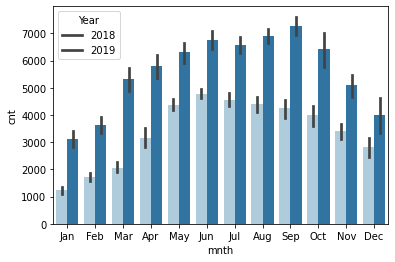

In [1702]:
p=sns.barplot('mnth','cnt',hue='yr',data=df,palette='Paired')
p.legend(title='Year',labels=['2018', '2019'])
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

**Insight:** year 2018 count of demand bike is more in june month and lower at januaty month. Year 2019 count of demand bike increses all month with respect to month in 2018 year.The year 2019, demand bike is more in september and less in january.

**Count v/s Season**

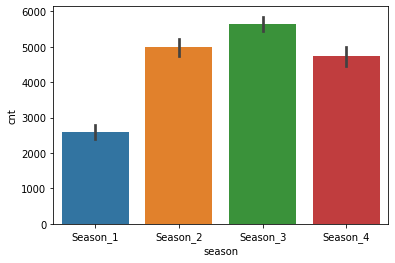

In [1703]:
p=sns.barplot('season','cnt',data=df)
p.set(xticklabels=["Season_1", "Season_2", "Season_3","Season_4"]);


In [1704]:
k=df[['cnt','season']]
# sum of biked hired in total data on season3
print("sum of biked hired in total data on season_3 is ",sum(k.loc[(k['season']==3)]['cnt']))
# sum of biked hired in total data on season3

sum of biked hired in total data on season_3 is  1061129


**Insight:** Bike demand count is more in Season_3 .Season_3 is in range of June to August. While demand is less in season 1. the season_1 range is between january to march. Other three seasons the bike demand is 1061129

**Count v/s Weather**

In [1705]:
df["weathersit"].unique()

array([2, 1, 3])

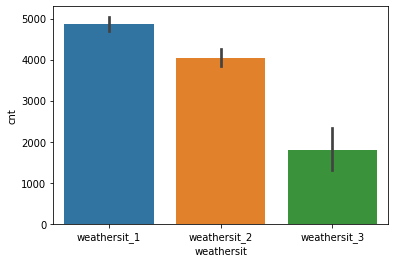

In [1706]:
p=sns.barplot('weathersit','cnt',data=df)
p.set(xticklabels=["weathersit_1", "weathersit_2", "weathersit_3"]);

In [1707]:
k=df[['cnt','weathersit']]
w1=(sum(k.loc[(k['weathersit']==1)]['cnt'])/sum(df["cnt"]))*100 #68.61% for weathersit_1
w2=(sum(k.loc[(k['weathersit']==2)]['cnt'])/sum(df["cnt"]))*100 #30.23% for weathersit_2
w3=(sum(k.loc[(k['weathersit']==3)]['cnt'])/sum(df["cnt"]))*100 #1.15% for weathersit_3
print("percentage of amount of bike hired in  weathersit_1, weathersit_2,weathersit_3 in w.r.t total data are","{:.2f}".format(w1),",","{:.2f}".format(w2),",","{:.2f}".format(w3))

percentage of amount of bike hired in  weathersit_1, weathersit_2,weathersit_3 in w.r.t total data are 68.61 , 30.24 , 1.15


**Insight:** first type weather situation or condition is more suitable for increase in the demand of bike. The percentage of amount of bike hired in weathersit_1 w.r.t total data is 68.61%.
The percentage of amount of bike hired in weathersit_2 w.r.t total data is 30.23%.The percentage of amount of bike hired in weathersit_3 w.r.t total data is 1.15%.


**Count v/s Year**

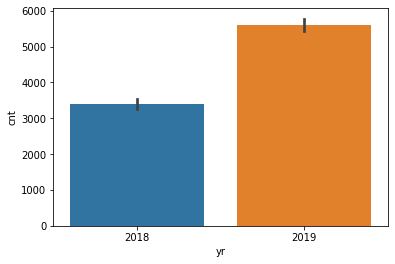

In [1708]:
p=sns.barplot('yr','cnt',data=df)
p.set(xticklabels=["2018", "2019"]);

In [1709]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1710]:
#sum(df['yr']>1)
k=df[['cnt','yr']]
sum(k.loc[(k['yr']==0)]['cnt'])# sum of bike hired in 2018

1243103

In [1711]:
sum(k.loc[(k['yr']==1)]['cnt']) #sum of bike hired in 2019

2047742

rate of change (2018 to 2019)

In [1712]:
100*((sum(k.loc[(k['yr']==1)]['cnt'])-sum(k.loc[(k['yr']==0)]['cnt']))/sum(k.loc[(k['yr']==0)]['cnt'])) #rate of change

64.72826467316062

**Insight:** demand of bike is more in 2019 than 2018. The number of bike hired in 2018 is 1243103 and The number of bike hired in 2019 is 2047742. The rate of change bike hiring from 2018 to 2019 is 64.72%

**Count v/s Days**

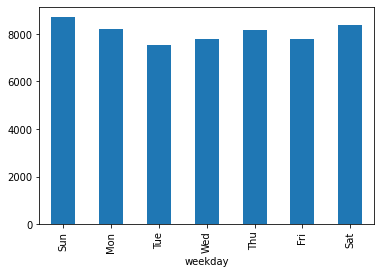

In [1713]:
p=df.groupby('weekday')['cnt'].max().plot(kind='bar')
p.set(xticklabels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']);

**Insight:**Saturday and sunday is more demand in bikes. Weekend bike hiring count is more than weekdays count

**Corelation**

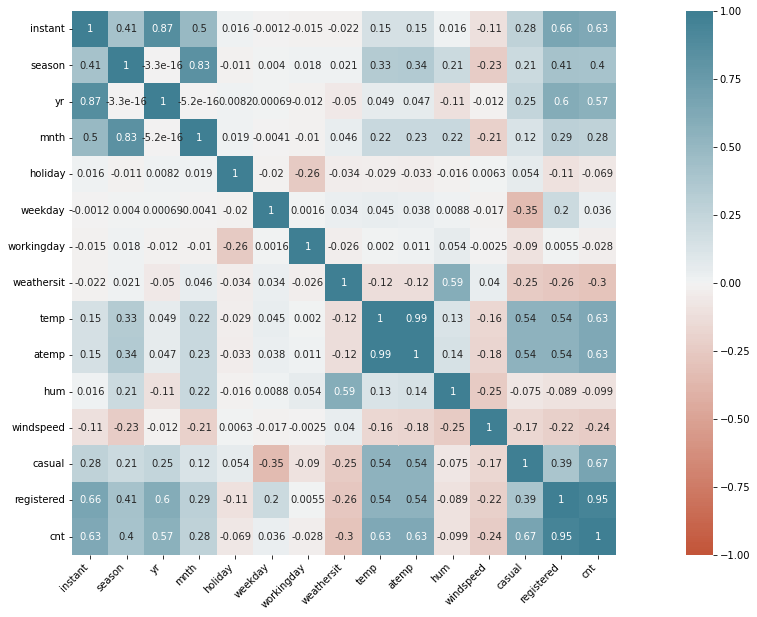

In [1714]:
df_corr = df.corr()
plt.figure(figsize=(25,10))
ax = sns.heatmap( df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Insight: The temp and atemp are strongly corelated(0.99). So there is Multicollinearity among them. So one of the column shold drop. Also the count corelated with temp,atemp


**Count V/s Temperature**

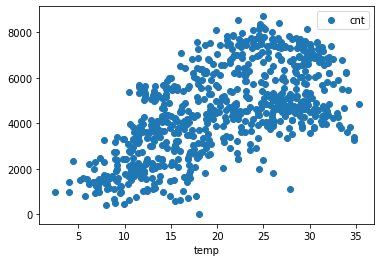

In [1715]:
#plt.scatter('temp','cnt',data=df)
df.plot(x='temp', y='cnt', style='o')


**Insight:** a positive corealtion can be seen in temp and count. The temperature increases the demand of the bike also increases

**temp v/s atemp**

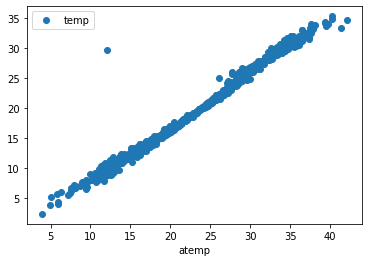

In [1716]:
df.plot(x='atemp', y='temp', style='o')

**Insight**:Multicollinearity among temp and atemp.It decide which parameters to keep based on VIF and p-value w.r.t other variables

**Count v/s windspeed**

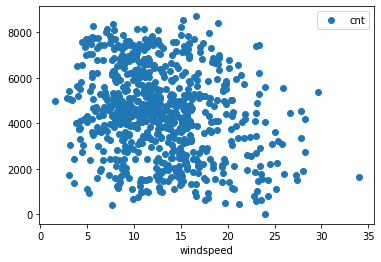

In [1717]:
df.plot(x='windspeed', y='cnt', style='o')

**Insight**: It also show negative corelation among windspeed and count

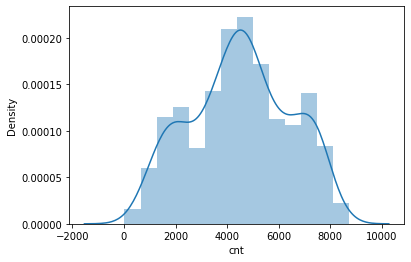

In [1718]:
sns.distplot(df['cnt'])# density with respect to the count

# **Dummy Variables**

Dealing categorical varible using pandas get dummies

In [1719]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1720]:
df_new=df1[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]# creating new dataset from the orginal dataset

In [1721]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Convert season, workingday, weathersit,month,weekday varible into category

In [1722]:
df_new['season']=df_new['season'].astype('category')
df_new['weathersit']=df_new['weathersit'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')

In [1723]:
#Drop first colum of dummy variable each of the set.
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

**Insight:** Dummies varible created for each of the category varible

# **Data split into test data and traniing dataset**

In [1724]:
df_new.shape # shape of the dataframe

(730, 30)

In [1725]:
from sklearn.model_selection import train_test_split
# data set here divided it into 70:30 ratio
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 333)

**Insight**:The dataset created into 70:30 ratio

**Traning dataset and test dataset info**

In [1726]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [1727]:
#df_train.info()
df_train.shape # verify the training dataset got splitted correctly

(510, 30)

In [1728]:
#df_test.info()
df_test.shape# verify the test data got splitted correctly

(219, 30)

# **Feauture** **Rescaling**

In [1729]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler() # using minmax scaler for scaling

In [1730]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


**Scalar function is applied to temp, atemp, hum, windspeed, cnt**

In [1731]:
#Scalar function applied

num_vars=['temp','atemp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [1732]:

df_train.head(4)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0


# **Linear Model**:RFE

**Dividing X and y dataset**

In [1733]:
# Dividing X and y dataset 
y_train = df_train.pop('cnt')
X_train = df_train

In [1734]:
# RFE for automated feature selection
from sklearn.feature_selection import RFE
# LinearRegression
from sklearn.linear_model import LinearRegression

In [1735]:

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

**Number of feature varible for selection is 15**

In [1736]:
rfe = RFE(lm,n_features_to_select=15) # running RFE (varible 15)
rfe = rfe.fit(X_train, y_train)

**Insight:** Number of feature varible for selection is the half of the dataset varible (30)

**Ranking according to selection**

In [1737]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

**Selected columns**

In [1738]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

**Insight:** index of columns which is selected 

**Unselected columns**

In [1739]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

**Insight:** index of columns which is not selected

**Test dataframe**

In [1740]:
# Creating X_test dataframe  
X_train_rfe = X_train[col]#RFE selected variables

# **Linear Model**:**Model 1**

**VIF: Model 1**

In [1741]:
#VIF  
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending =False)
vif 


,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


**Model 1 fitting and summary**

In [1742]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
# first  model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.36e-185
Time:                        16:32:00   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437   

# **Model 2**

**Insight:** Removing the variable 'atemp' based on its high p-valueand VIF (temp is not removed because bike demand depends on it more)

In [1743]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1) # Droping the temp

**VIF : Model 2**

In [1744]:
# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


**Create Model 2 and summary**

In [1745]:
X_train_lm2 = sm.add_constant(X_train_new)

# Create a second model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.20e-186
Time:                        16:32:00   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509   

# **Model 3** 

**Insight :** removing the variable 'hum' based on its very high VIF value.

In [1746]:
X_train_new = X_train_new.drop(["hum"], axis = 1)# Droping hum column

**VIF : Model 3**

In [1747]:
# Check VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,yr,2.01
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


**Create model 3 and summary**

In [1748]:
X_train_lm3 = sm.add_constant(X_train_new)
# Create third model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.86e-183
Time:                        16:32:00   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.018      7.702   

# **Model 4**

**Insight:**Removing the variable 'season3' based on its very high VIF value.

In [1749]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)#droping season_4

**VIF : Model 4**

In [1750]:
#  VIF Check 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


**Creating Model 4 and summary**

In [1751]:
X_train_lm4 = sm.add_constant(X_train_new)
# Create a fourth model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          1.66e-180
Time:                        16:32:00   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828   

# **Model 5**

**Insight**:  Removing the variable 'weekday_1' based on its very high p-value.

In [1752]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)# droping weekday_1

**VIF : Model 5**

In [1753]:
# Check VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.03
2,windspeed,3.64
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_2,1.18
5,mnth_3,1.14


**Creating Model 5 and summary**

In [1754]:
X_train_lm5 = sm.add_constant(X_train_new)
# Create fifth model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          8.89e-181
Time:                        16:32:00   Log-Likelihood:                 484.34
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     498   BIC:                            -893.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1189      0.018      6.556   

# **Model 6**

Insight:Removing the variable 'mnth_10' based on its high 'p-value'.

In [1755]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)# Drop mnth_10

**VIF: Model 6**

In [1756]:
# Check  VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.60
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.38
6,mnth_9,1.20
7,weekday_2,1.18
5,mnth_3,1.14
9,weathersit_3,1.07


**Creating Model 6 and summary**

In [1757]:

X_train_lm6 = sm.add_constant(X_train_new)

# Create a Sixth model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          9.43e-181
Time:                        16:32:00   Log-Likelihood:                 481.45
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     499   BIC:                            -894.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1163      0.018      6.395   

# **Model 7**
**Insight:**Removing the variable 'mnth_3' based on its high 'p-value'.

In [1758]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)#droping mnth_3

**VIF: Model 7**

In [1759]:
# Check  VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.46
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.36
5,mnth_9,1.19
6,weekday_2,1.18
8,weathersit_3,1.07


**Creating Model 7 and summary**

In [1760]:

X_train_lm7 = sm.add_constant(X_train_new)

# Create a Seventh model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.62e-180
Time:                        16:32:01   Log-Likelihood:                 477.53
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     500   BIC:                            -892.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1269      0.018      7.091   

# **Model 8**
**Insight:**Removing the variable 'weekday_2' based on its high 'p-value'.

In [1761]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)# removing weekday_2

**VIF: Model 8**

In [1762]:
# Check  VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.56
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


**Creating Model 8 and summary**

In [1763]:

X_train_lm8 = sm.add_constant(X_train_new)

# Create a eight model
lr8 = sm.OLS(y_train, X_train_lm8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          7.32e-180
Time:                        16:32:01   Log-Likelihood:                 473.56
No. Observations:                 510   AIC:                            -929.1
Df Residuals:                     501   BIC:                            -891.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1236      0.018      6.872   

**Insight:** The p-values for all the predictors appear to be significant, and  model 8 appears to have very low multicollinearity amongst the predictors. The Model 8 regard as our final model

# **Final Model**



Hypothesis Testing:


H0:All coefficent=0 (Null hypothesis)

H1: at least one coefficent !=0 

**lr8 model coefficient values**

In [1764]:
lr8.params

const           0.123599
yr              0.230940
temp            0.561392
windspeed      -0.155752
season_2        0.081982
season_4        0.126165
mnth_9          0.096124
weathersit_2   -0.073252
weathersit_3   -0.302187
dtype: float64

**Insights:**

Model 8 summary,  all our coefficients are not equal to zero which means we reject null hypothesis(H0)

F-statistic: 281.3

Prob (F-statistic): 7.32e-180

The F-Statistics value of  281.3 and the all states p-value approximately 0.0000 So overall model is significant

**Residual Analysis of the train data**

**Assumption:**error terms are normally distributed with mean zero

In [1765]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'errors')

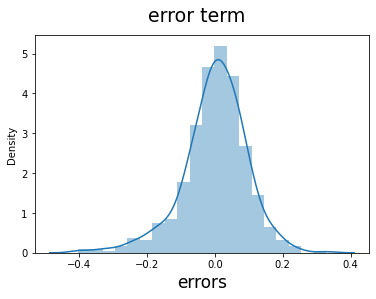

In [1766]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('error term', fontsize = 19)
plt.xlabel('errors', fontsize = 17)  

**Insight:**
Above histogram, the residuals are normally distributed. so the assumption for linear regression is valid.

# **Prediction using Model 8**

apply scaler to all numeric variables in test dataset.

In [1767]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1768]:
y_test = df_test.pop('cnt')
X_test = df_test
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
# Making predictions using the final model (lr6)
y_pred = lr8.predict(X_test_lm8)

**Model Evaluation**

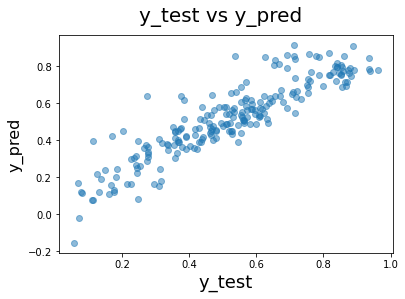

In [1769]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [1770]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8067023927509684

# **Final Report**

***Outcome: The variables that are significant in predicting the demand for shared bikes (at least 3).***

In [1771]:
lr8.params

const           0.123599
yr              0.230940
temp            0.561392
windspeed      -0.155752
season_2        0.081982
season_4        0.126165
mnth_9          0.096124
weathersit_2   -0.073252
weathersit_3   -0.302187
dtype: float64

**the top three variables that influences the bike hiring are:**


**temp (Temperature)**

The coefficient value of temp is 0.561392 . So the unit increase in temp variable increase the bike hiring count by 0.5613 units.

**weathersit_3**

The coefficient value Weathersit_3 is -0.302187.The unit increase in Weathersit_3 variable decrease the bike hire count by 0.3021 units.

**yr (Year)**

The coefficient value of year is  0.230940. The unit increase in yr variable increases the bike hire count by  0.230940 units.

**Others varibles influence in bike hiring:**

**season_4 and windspeed**: the coefficent value 0.126165 and  -0.155752 repectively. So season_4 increses the bike hire count with 0.1261 units and windspeed decrease the bike hire 0.15575 units

    